## 1 Data Wrangling

#  Contents<a id='Contents'></a>
* [1. Imports](#1._Imports)
* [2. Convert txt file to data frame](#2._Convert_txt_file_to_data_frame)
* [3. Clean empty values](#3._Clean)
* [4. Data Types Problem](#4._Data_Types)
* [5. Profiling](#5._Profiling)
* [6. Drop columns](#6._Drop_columns)
* [7. Explore the Data](#7._Explore_Data)
    * [7.1. Date Time Features](#7._Date_Time)
    * [7.2. Categorical Features](#7._Categorical)
    * [7.3. Numerical Features](#7._Numerical)
* [8. Save Data](#8._Save)


## 1. Imports <a id='1._Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
pd.options.mode.chained_assignment = None  # default='warn'
from pandas_profiling import ProfileReport


## 2. Convert txt file to data frame<a id='2._Convert_txt_file_to_data_frame'></a>

In [2]:
# https://stackoverflow.com/questions/47889565/reading-json-objects-from-text-file-into-pandas

list = []
with open('transactions.txt') as file:
    for line in file:
        list.append(json.loads(line)) #convert each line to json then add to list



In [3]:
transactions = pd.DataFrame(list) # convert this list into panda data frame

## 3. Clean empty values<a id='3._Clean'></a>


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [5]:
transactions.isna().any()

accountNumber               False
customerId                  False
creditLimit                 False
availableMoney              False
transactionDateTime         False
transactionAmount           False
merchantName                False
acqCountry                  False
merchantCountryCode         False
posEntryMode                False
posConditionCode            False
merchantCategoryCode        False
currentExpDate              False
accountOpenDate             False
dateOfLastAddressChange     False
cardCVV                     False
enteredCVV                  False
cardLast4Digits             False
transactionType             False
echoBuffer                  False
currentBalance              False
merchantCity                False
merchantState               False
merchantZip                 False
cardPresent                 False
posOnPremises               False
recurringAuthInd            False
expirationDateKeyInMatch    False
isFraud                     False
dtype: bool

There is no null value. Check for other unusable data entry

In [6]:
transactions.head()

accountNumber customerId  creditLimit  availableMoney  transactionDateTime  \
0     737265056  737265056       5000.0          5000.0  2016-08-13T14:27:32   
1     737265056  737265056       5000.0          5000.0  2016-10-11T05:05:54   
2     737265056  737265056       5000.0          5000.0  2016-11-08T09:18:39   
3     737265056  737265056       5000.0          5000.0  2016-12-10T02:14:50   
4     830329091  830329091       5000.0          5000.0  2016-03-24T21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode  ... echoBuffer currentBalance merchantCity merchantState  \
0           02  ...                       0.0                              
1           09  ...                       0.0                              
2           09  ...                       0.0                              
3           09  ...                       0.0                              
4           02  ...                       0.0                              

  merchantZip cardPresent posOnPremises recurringAuthInd  \
0                   False                                  
1                    True                                  
2                   False                                  
3                   False                                  
4                    True                                  

  expirationDateKeyInMatch isFraud  
0                    False   False  
1                    False   False  
2                    False   False  
3                    False   False  
4                    False   False  

[5 rows x 29 columns]

posOnPremises and AuthInd are empty

In [7]:
print((transactions.echoBuffer == "").value_counts())

True    786363
Name: echoBuffer, dtype: int64


In [8]:
transactions.shape

(786363, 29)

In [9]:
# too big cut to half use iloc for slicing on index
transactions = transactions.iloc[50000:,:]

In [10]:
# replace empty string with Nan
transactions_Nan = transactions.replace('', np.nan)

In [11]:
# drop all Nan column
transactions_dropped = transactions_Nan.dropna(how='all',axis= 1)

In [12]:
# check if successfuly dropped
# 6 columns have been dropped
transactions_dropped

accountNumber customerId  creditLimit  availableMoney  \
50000      246251253  246251253       5000.0          624.04   
50001      246251253  246251253       5000.0          271.42   
50002      246251253  246251253       5000.0         1677.46   
50003      246251253  246251253       5000.0         1574.70   
50004      246251253  246251253       5000.0         1533.20   
...              ...        ...          ...             ...   
786358     732852505  732852505      50000.0        48904.96   
786359     732852505  732852505      50000.0        48785.04   
786360     732852505  732852505      50000.0        48766.15   
786361     732852505  732852505      50000.0        48716.72   
786362     732852505  732852505      50000.0        48666.83   

        transactionDateTime  transactionAmount            merchantName  \
50000   2016-01-20T19:00:48             352.62  Domino's Pizza #347016   
50001   2016-01-20T19:37:11              22.96              amazon.com   
50002   2016-01-20T19:45:23             102.76            discount.com   
50003   2016-01-20T19:52:39              41.50     Shake Shack #332129   
50004   2016-01-20T20:40:56             241.64  Dunkin' Donuts #237164   
...                     ...                ...                     ...   
786358  2016-12-22T18:44:12             119.92                    Lyft   
786359  2016-12-25T16:20:34              18.89                hulu.com   
786360  2016-12-27T15:46:24              49.43                    Lyft   
786361  2016-12-29T00:30:55              49.89             walmart.com   
786362  2016-12-30T20:10:29              72.18                    Uber   

       acqCountry merchantCountryCode posEntryMode  ... accountOpenDate  \
50000          US                  US           02  ...      2014-10-02   
50001         MEX                 MEX           02  ...      2014-10-02   
50002          US                  US           02  ...      2014-10-02   
50003          US                  US           05  ...      2014-10-02   
50004          US                  US           09  ...      2014-10-02   
...           ...                 ...          ...  ...             ...   
786358         US                  US           90  ...      2012-08-23   
786359         US                  US           09  ...      2012-08-23   
786360         US                  US           02  ...      2012-08-23   
786361         US                  US           09  ...      2012-08-23   
786362         US                  US           05  ...      2012-08-23   

       dateOfLastAddressChange cardCVV enteredCVV cardLast4Digits  \
50000               2016-01-19     455        455            6002   
50001               2016-01-19     455        455            6002   
50002               2016-01-19     455        455            6002   
50003               2016-01-19     455        455            6002   
50004               2016-01-19     455        455            6002   
...                        ...     ...        ...             ...   
786358              2012-08-23     936        936            3783   
786359              2012-08-23     939        939            3388   
786360              2012-08-23     936        936            3783   
786361              2012-08-23     939        939            3388   
786362              2012-08-23     939        939            3388   

       transactionType currentBalance cardPresent expirationDateKeyInMatch  \
50000         PURCHASE        4375.96        True                    False   
50001         PURCHASE        4728.58       False                    False   
50002         PURCHASE        3322.54       False                    False   
50003         PURCHASE        3425.30        True                    False   
50004         PURCHASE        3466.80        True                    False   
...                ...            ...         ...                      ...   
786358        PURCHASE        1095.04       False                    Fals

In [13]:
# check how many Nan values in each column
transactions_dropped.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4298
merchantCountryCode          679
posEntryMode                3772
posConditionCode             379
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              656
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

Nan are appearing in these:
1. acqCountry 
2. merchantCountryCode
3. posEntryMode
4. posConditionCode
5. transactionType

**1. Lets check the values in acqCountry. If there is mode that is particularly large lets use it.**

In [14]:
transactions_dropped.acqCountry.mode()[0]

'US'

In [15]:
((transactions_dropped.acqCountry == "US").value_counts())/(transactions_dropped.shape[0])


True     0.98518
False    0.01482
Name: acqCountry, dtype: float64

98% are US so let's replace them with US

In [16]:
transactions_dropped.acqCountry.replace(np.nan, 'US', inplace = True)


In [17]:
transactions_dropped.acqCountry.isnull().value_counts()

False    736363
Name: acqCountry, dtype: int64

**2. Lets check the values in acqCountry. If there is mode that is particularly large lets use it.**

In [18]:
transactions_dropped.merchantCountryCode.mode()[0]

'US'

In [19]:
((transactions_dropped.merchantCountryCode == "US").value_counts())/(transactions_dropped.shape[0])

True     0.990054
False    0.009946
Name: merchantCountryCode, dtype: float64

Lets also replace this with the mode

In [20]:
transactions_dropped.merchantCountryCode.replace(np.nan, 'US', inplace = True)

**3. Lets check the values in posEntryMode. If there is mode that is particularly large lets use it.**

In [21]:
transactions_dropped.posEntryMode.mode()[0]

'05'

In [22]:
((transactions_dropped.posEntryMode == "05").value_counts())/(transactions_dropped.shape[0])

False    0.599336
True     0.400664
Name: posEntryMode, dtype: float64

We cannot just replace this with mode.

**4. For now let's just remove the rows with missing values. But ideally we should use classification to predict its value**

In [23]:
# drop rows with any Nan
transactions_dropped = transactions_dropped.dropna(how = 'any', axis = 0)

In [24]:
# check no Nan values on any row
transactions_dropped.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

## 4. Data Types Problem<a id='4._Data_Types'></a>



Let's see if all the data are in a usable form

In [25]:
transactions_dropped.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
currentBalance              float64
cardPresent                    bool
expirationDateKeyInMatch       bool
isFraud                        bool
dtype: object

### 4.1 Change Datetime

We can change date entries to date time objects. That is the column:
1. transactionDateTime
2. currentExpDate
3. accountOpenDate
4. dateOfLastAddressChange

In [26]:
columns_to_change = ['transactionDateTime','currentExpDate','accountOpenDate','dateOfLastAddressChange']
for column in columns_to_change:
#     transactions_dropped.loc[:,column] = pd.to_datetime(transactions_dropped[column])
    transactions_dropped.loc[:,column] = pd.to_datetime(transactions_dropped[column].copy())
# pd.to_datetime takes series as argument
# dont need to do loc on the assignment RHS
    

In [27]:
# Cannot do:
# 1. transactions_dropped.loc[:,column] = transactions_dropped.loc[:,column].apply(pd.to_datetime, errors = 'coerce')

# 2. for column in columns_to_change:
#     transactions_dropped[column] = pd.to_datetime(transactions_dropped[column])

#     transactions_dropped.loc[:,column] = pd.to_datetime(transactions_dropped.loc[:,column])
# the key is put pd.to_datetime at the front. and also do .loc

In [28]:
transactions_dropped.dtypes

accountNumber                       object
customerId                          object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                             object
enteredCVV                          object
cardLast4Digits                     object
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
dtype: obje

## 5. Profiling<a id='5._Profiling'></a>

In [29]:
profile = ProfileReport(transactions_dropped, title = 'Profile Report')

In [30]:
profile

## 5 Profiling Summary

1. Total Fraud: 

    - Only 11513 out of 756363 of transactions are fraud, which means only 1.5% are fraudulent. This is very small.

2. Date type:

    - Everything looks normal: Transaction starts from January 2016 to December 30th


3. Categorical:

    - Account number
    - customerID: looks like its identical to account number
    - transaction type: Does fraud occur in transaction type other than purchase ? if not, we can get rid of it
    - merchantName: check for duplicates
    - cardLast4Digits: some only has 2 digits, does this mean fraud?


4. Numerical:

    - Balance:
    Need to deal with zeros and extreme values

    - Transaction amount: 
There seems to be a high correlation between transaction amount and fraudulence


## 6 Drop columns<a id='6._Drop_columns'></a>

From the above profiling it seems like there are no duplicate rows, but lets check for duplicate columns

### 6.1 Duplicate column

1. Check if customer Id is the same as account number

In [31]:
(transactions_dropped['customerId']==transactions_dropped['accountNumber']).value_counts()

True    731560
dtype: int64

The true entry count is the same as total number of rows, they are the same. so let's remove them

In [32]:
transactions_dropped = transactions_dropped.drop(columns='customerId')

2. Check if acqCountry is the same as merchant countrycode

In [33]:
(transactions_dropped['acqCountry']==transactions_dropped['merchantCountryCode']).value_counts()

True     731464
False        96
dtype: int64

not necessarily the same. so lets not remove them

3. Check if cardCVV is the same as enteredCVV

In [34]:
transactions_dropped[(transactions_dropped['cardCVV']!=transactions_dropped['enteredCVV'])].shape

(6525, 22)

there are 6676 unmatched CVV. We cannot drop them

4. It may be useful to create a column of 'CVV match'

In [35]:
transactions_dropped['CVVMatch'] = transactions_dropped['cardCVV'] == transactions_dropped['enteredCVV']


Drop enteredCVV and card CVV since we already have matched CVV

In [36]:
transactions_dropped = transactions_dropped.drop(columns=['enteredCVV','cardCVV'])

### 6.2 Useless column

reset index

In [37]:
transactions_dropped.reset_index(drop = True)

accountNumber  creditLimit  availableMoney transactionDateTime  \
0          246251253       5000.0          624.04 2016-01-20 19:00:48   
1          246251253       5000.0          271.42 2016-01-20 19:37:11   
2          246251253       5000.0         1677.46 2016-01-20 19:45:23   
3          246251253       5000.0         1574.70 2016-01-20 19:52:39   
4          246251253       5000.0         1533.20 2016-01-20 20:40:56   
...              ...          ...             ...                 ...   
731555     732852505      50000.0        48904.96 2016-12-22 18:44:12   
731556     732852505      50000.0        48785.04 2016-12-25 16:20:34   
731557     732852505      50000.0        48766.15 2016-12-27 15:46:24   
731558     732852505      50000.0        48716.72 2016-12-29 00:30:55   
731559     732852505      50000.0        48666.83 2016-12-30 20:10:29   

        transactionAmount            merchantName acqCountry  \
0                  352.62  Domino's Pizza #347016         US   
1                   22.96              amazon.com        MEX   
2                  102.76            discount.com         US   
3                   41.50     Shake Shack #332129         US   
4                  241.64  Dunkin' Donuts #237164         US   
...                   ...                     ...        ...   
731555             119.92                    Lyft         US   
731556              18.89                hulu.com         US   
731557              49.43                    Lyft         US   
731558              49.89             walmart.com         US   
731559              72.18                    Uber         US   

       merchantCountryCode posEntryMode posConditionCode  ... currentExpDate  \
0                       US           02               01  ...     2029-02-01   
1                      MEX           02               01  ...     2021-07-01   
2                       US           02               08  ...     2023-03-01   
3                       US           05               01  ...     2027-12-01   
4                       US           09               01  ...     2022-09-01   
...                    ...          ...              ...  ...            ...   
731555                  US           90               01  ...     2022-12-01   
731556                  US           09               01  ...     2023-08-01   
731557                  US           02               01  ...     2025-08-01   
731558                  US           09               99  ...     2022-07-01   
731559                  US           05               01  ...     2024-05-01   

       accountOpenDate dateOfLastAddressChange cardLast4Digits  \
0           2014-10-02              2016-01-19            6002   
1           2014-10-02              2016-01-19            6002   
2           2014-10-02              2016-01-19            6002   
3           2014-10-02              2016-01-19            6002   
4           2014-10-02              2016-01-19            6002   
...                ...                     ...             ...   
731555      2012-08-23              2012-08-23            3783   
731556      2012-08-23              2012-08-23            3388   
731557      2012-08-23              2012-08-23            3783   
731558      2012-08-23              2012-08-23            3388   
731559      2012-08-23              2012-08-23            3388   

       transactionType currentBalance  cardPresent  expirationDateKeyInMatch  \
0             PURCHASE        4375.96         True                     False   
1             PURCHASE        4728.58        False                     False   
2             PURCHASE        3322.54        False                     False   
3             PURCHASE        3425.30         True                     False   
4             PURCHASE        3466.80         True                     False   
...                ...            ...          ...                       ...   
731555        PURCHASE        1095.04        Fa

In [38]:
transactions.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

## 7 Explore Data Entries<a id='7._Explore_Data'></a>

### 7.1 Datetime Features <a id='7._Date_Time'></a>



#### 7.1.1 Check if it has healthy distribution. no outliers

What do I need to change about date time ?

In [39]:
# fig, axs = plt.subplots(3,2,figsize = (15,15))
fraud_transactions = transactions_dropped[transactions_dropped.isFraud == True]
fraud_transactions
fraud_transactions= fraud_transactions.sort_values('transactionDateTime',ascending=True)
transactions= transactions_dropped.sort_values('transactionDateTime',ascending=True)



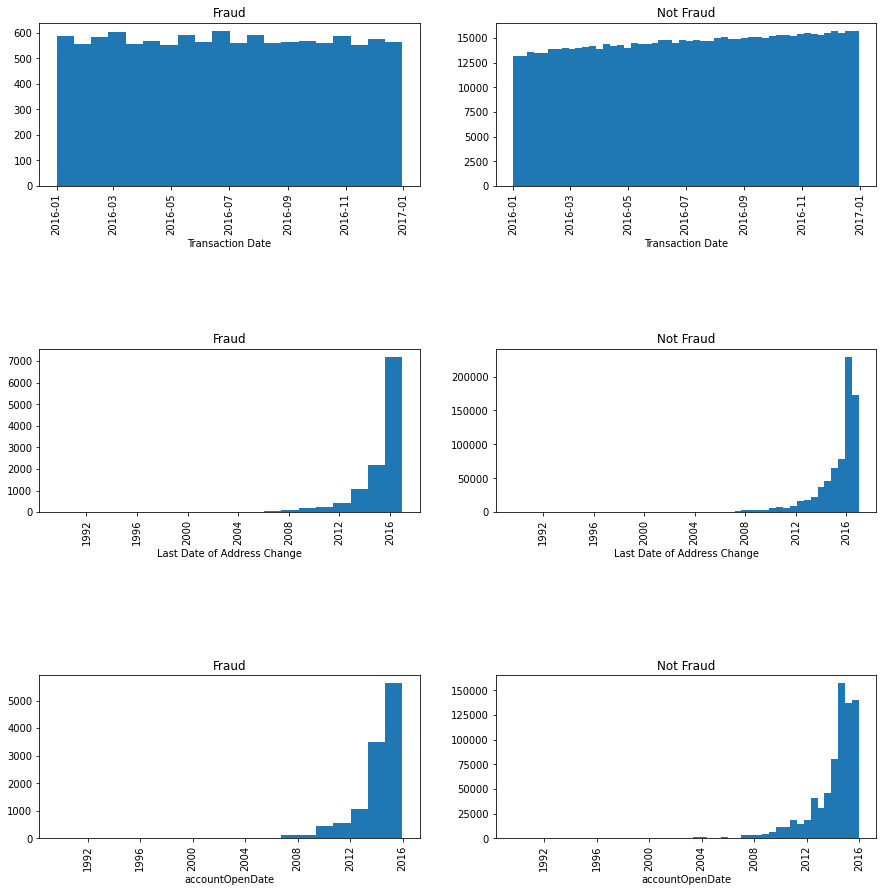

In [40]:
fig, axs = plt.subplots(3,2,figsize = (15,15))

# Fraud (1st column)
axs[0][0].hist(fraud_transactions['transactionDateTime'], bins = 20)
axs[0][0].set_xlabel('Transaction Date')
axs[0][0].set_title('Fraud')

axs[1][0].hist(fraud_transactions['dateOfLastAddressChange'], bins = 20)
axs[1][0].set_xlabel('Last Date of Address Change')
axs[1][0].set_title('Fraud')


axs[2][0].hist(fraud_transactions['accountOpenDate'], bins = 20)
axs[2][0].set_xlabel('accountOpenDate')
axs[2][0].set_title('Fraud')

# # Not Fraud (2nd Column)
axs[0][1].hist(transactions['transactionDateTime'], bins = 50)
axs[0][1].set_xlabel('Transaction Date')
axs[0][1].set_title('Not Fraud')

axs[1][1].hist(transactions['dateOfLastAddressChange'], bins = 50)
axs[1][1].set_xlabel('Last Date of Address Change')
axs[1][1].set_title('Not Fraud')

axs[2][1].hist(transactions['accountOpenDate'], bins = 50)
axs[2][1].set_xlabel('accountOpenDate')
axs[2][1].set_title('Not Fraud')

# Rotate x value 
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation =90)
    
plt.subplots_adjust(hspace = 1)

Looks like a healthy distribution no outliers. Transaction is between January 2016 to Dec 2016

### 7.2 Categorical Features <a id='7._Categorical'></a>



#### 7.2.1 Merchant Name

Check if there is any duplicate that are mistype

In [41]:
# check the top fraud merchant names
fraud_transactions.merchantName.value_counts().head(50)

Lyft                             695
ebay.com                         606
Fresh Flowers                    523
Uber                             424
cheapfast.com                    422
sears.com                        388
walmart.com                      379
oldnavy.com                      363
staples.com                      360
alibaba.com                      358
amazon.com                       354
gap.com                          341
apple.com                        330
target.com                       329
discount.com                     317
American Airlines                288
Blue Mountain Online Services    205
Fresh eCards                     199
Next Day Online Services         160
Blue Mountain eCards             115
Mobile eCards                    103
Fresh Online Services            103
Next Day eCards                   91
Delta Airlines                    88
Regal Cinemas #05791              83
EZ Putt Putt #551896              70
EZ Putt Putt #69446               70
E

Looks like there are many branches of the same company. Should we combine them together ?
Lets check how many EZ Putt Putt are there



In [42]:
fraud_transactions[fraud_transactions.merchantName.str.contains('EZ') == True].merchantName.value_counts()

EZ Putt Putt #69446     70
EZ Putt Putt #551896    70
EZ Putt Putt #40513     67
EZ Putt Putt #755869    60
EZ Putt Putt #804489    60
EZ Putt Putt #240241    56
EZ Putt Putt #503815    49
EZ Putt Putt #982199    43
Name: merchantName, dtype: int64

In [43]:
fraud_transactions[fraud_transactions.merchantName.str.contains('AMC') == True].merchantName.value_counts()

AMC #692956    35
AMC #128743    29
AMC #74121     26
AMC #79863     26
AMC #145832    25
AMC #606218    23
AMC #724446    20
AMC #191138    19
AMC #706324    17
AMC #552863    17
Name: merchantName, dtype: int64

In [44]:
fraud_transactions[fraud_transactions.merchantName.str.contains('Hardee') == True].merchantName.value_counts()

Hardee's #584914    3
Hardee's #589037    2
Hardee's #229101    2
Hardee's #601816    2
Hardee's #941387    2
Hardee's #259223    2
Hardee's #852712    2
Hardee's #254356    2
Hardee's #918765    2
Hardee's #509359    1
Hardee's #696425    1
Hardee's #415826    1
Hardee's #245522    1
Hardee's #978815    1
Hardee's #941439    1
Hardee's #998351    1
Hardee's #186774    1
Hardee's #49071     1
Hardee's #129117    1
Hardee's #102912    1
Hardee's #745531    1
Hardee's #97825     1
Hardee's #187642    1
Hardee's #533765    1
Hardee's #385283    1
Hardee's #940832    1
Hardee's #519881    1
Hardee's #377180    1
Hardee's #510141    1
Hardee's #862001    1
Hardee's #814735    1
Hardee's #854553    1
Hardee's #431398    1
Hardee's #283538    1
Name: merchantName, dtype: int64

Lets get rid of this column and possibly put all franchise under one name

In [45]:
separator = '#'
transactions['merchantName'] = [merchant_name.split(separator,1)[0].rstrip() for merchant_name in transactions['merchantName']]
# for each merchant name in transaction, split them in two using separator '#'. take the first element of the split
# strip the last empty space

transactions['merchantName'].str.contains('#').value_counts()

False    731560
Name: merchantName, dtype: int64

In [46]:
# Do the same with fraud transactions
fraud_transactions = transactions[transactions.isFraud ==True]
fraud_transactions['merchantName'].value_counts().head(20)

Lyft                 695
ebay.com             606
Fresh Flowers        523
EZ Putt Putt         475
Uber                 424
cheapfast.com        422
sears.com            388
walmart.com          379
oldnavy.com          363
staples.com          360
alibaba.com          358
amazon.com           354
gap.com              341
apple.com            330
target.com           329
discount.com         317
American Airlines    288
In-N-Out             242
AMC                  237
Regal Cinemas        213
Name: merchantName, dtype: int64

There are alot of '.com' lets check how many .com are fraud

In [47]:
fraud_transactions['merchantName'].str.contains('.com').value_counts()

False    6854
True     4598
Name: merchantName, dtype: int64

There are more than half of fraud have .com in it. We could use this to make a new column

In [48]:
fraud_transactions.loc[:,'containsCom'] = fraud_transactions['merchantName'].str.contains('.com').copy()
transactions.loc[:,'containsCom'] = transactions.loc[:,'merchantName'].str.contains('.com').copy()



#### 7.2.2 Transaction Type



In [49]:
# Does fraud occur in transaction type other than purchase?
fraud_transactions['transactionType'].value_counts()


PURCHASE                11036
REVERSAL                  309
ADDRESS_VERIFICATION      107
Name: transactionType, dtype: int64

Not all fraud transaction are Purchase so we need to keep this

#### 7.2.3 Card last 4 digits.

What do we do with only 2 digits or anything not 4?

In [50]:
transactions[transactions['cardLast4Digits'].str.len() < 4].shape


(100684, 22)

There are many rows with string card last 4 digits less than
4. Lets keep this, the number of digits might give us some insights. It might be more useful to make a new variable that tells us the length of the digits than the actual number

In [51]:
transactions['lengthOfLast4Digits'] = transactions['cardLast4Digits'].str.len()
transactions['lengthOfLast4Digits'].value_counts()

4    630876
3     94163
2      5800
1       721
Name: lengthOfLast4Digits, dtype: int64

In [52]:
# remove card last 4 digits column
transactions = transactions.drop(columns = 'cardLast4Digits')

#### 7.2.4 Pos Entry Mode


09 PAN entry via electronic commerce, including chip.

02 Magnetic stripe read. For Plus transactions, this code also means    that the exact Track 2 content is included and CVV checking is        possible.

05 Integrated circuit card read; card data reliable.

90 Magnetic stripe read and extract content of Track 1 or Track 2 included (CVV check is possible).

80 Chip card was unable to process/magnetic stripe read default.

In [53]:
transactions['posEntryMode'].value_counts()

05    294593
09    221058
02    183394
90     18308
80     14207
Name: posEntryMode, dtype: int64

Everything make sense. No faulty entry

#### 7.2.5 Post Condition Code


01 - Cardholder not present

08 - Mail/telephone order (includes Visa phone and reoccurring transactions)

99 - Doesnt exist

In [54]:
transactions['posConditionCode'].value_counts()
# make new feature for 99

01    585203
08    139333
99      7024
Name: posConditionCode, dtype: int64

code 99 doesnt exist. Should we replace with other code? Lets check what are the transaction with code 99. 

In [55]:
transactions[transactions['posConditionCode'] == '99'].merchantName.value_counts().head(30)



AMC                      347
EZ Putt Putt             292
Uber                     244
Lyft                     216
target.com               157
cheapfast.com            155
discount.com             154
walmart.com              152
sears.com                150
staples.com              141
alibaba.com              141
apple.com                138
gap.com                  138
oldnavy.com              137
amazon.com               132
ebay.com                 131
Sunoco Gas               119
Rodeway Inn              116
Regal Cinemas            109
Universe Massage          91
Subway                    89
Fresh eCards              85
Apple iTunes              84
Fresh Flowers             84
Play Store                82
Domino's Pizza            81
Shell Gas                 80
Franks Pub                79
Hilton Hotels             78
Fresh Online Services     77
Name: merchantName, dtype: int64

There is no conclusive pattern that we can infer from this. So let's leave it as it is

#### 7.2.6 Country


check if merchant country code is the same as acqCountry entry



In [56]:
(transactions.acqCountry == transactions.merchantCountryCode).value_counts()

True     731464
False        96
dtype: int64

64 have countries that don't match. How many of these are fraud ?

In [57]:
transactions[(transactions.acqCountry != transactions.merchantCountryCode)].isFraud.value_counts()

False    95
True      1
Name: isFraud, dtype: int64

All of them are not fraud. What about the ones that have match countries:

In [58]:
transactions[transactions.acqCountry == transactions.merchantCountryCode].isFraud.value_counts()

False    720013
True      11451
Name: isFraud, dtype: int64

Whent the country is the same, there is more chance that is Fraud

### 7.3 Numerical Features <a id='7._Numerical'></a>



#### 7.3.1 Check for Zeros Transaction amount

In [59]:
fraud_transactions[fraud_transactions['transactionAmount']==0].transactionType.value_counts()

ADDRESS_VERIFICATION    107
REVERSAL                  5
Name: transactionType, dtype: int64

Most of the transaction types are address verification when transactiont amount is zero

#### 7.3.2 Check for distribution in credit card limit at 50000

How many transactions using credit card with limit of 50,000 are fraud? 

In [60]:
(transactions[transactions['creditLimit']==50000]['isFraud']).value_counts()

False    45253
True       794
Name: isFraud, dtype: int64

In [61]:
#  get the percentage
789/ (44973+789) * 100

1.7241379310344827

Only 1.72% of credit card with limit of 50,000 is fraud

What about the credit cards that are not 50,000. what are the percentages that are fraud?

In [62]:
(transactions[transactions['creditLimit']!=50000]['isFraud']).value_counts()

False    674855
True      10658
Name: isFraud, dtype: int64

In [63]:
#  get the percentage
10522/ (670998+10522) * 100

1.543901866416246

1.54% of credit card with limit of not 50,000 is fraud

They are about the same. so eventhough the cc limit is high, it only increase its fraud possibility by 0.2%
Should we keep this cc limit of 50,000?


Check the fraud/not fraud for each cc limit

Text(0.5, 0, 'cc limit $')

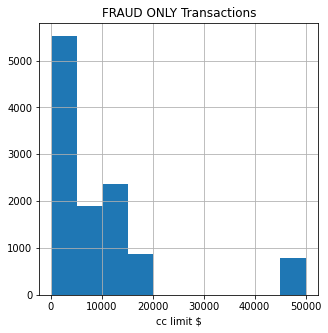

In [64]:
limitArray = fraud_transactions['creditLimit'].unique().sort()

fraud_transactions['creditLimit'].hist(figsize=(5,5))
plt.title('FRAUD ONLY Transactions')
plt.xlabel('cc limit $')

Text(0.5, 0, 'cc limit $')

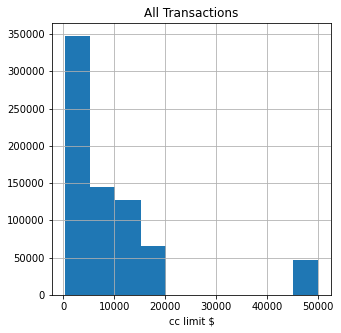

In [65]:
transactions['creditLimit'].hist(figsize=(5,5))
plt.title('All Transactions')
plt.xlabel('cc limit $')


We can do Z proportion test to check if the proportion is actually different ?
Lets reduce the number of unique values to 8 instead of 10. We can treat this entry as categorical instead

In [66]:
transactions['creditLimit'].value_counts()

5000.0     187844
15000.0    127308
7500.0      91023
2500.0      70058
20000.0     66056
10000.0     53754
50000.0     46047
1000.0      33698
250.0       30576
500.0       25196
Name: creditLimit, dtype: int64

In [67]:
conditions = [
    (transactions['creditLimit'] <= 1000.0),
    (transactions['creditLimit'] >= 2500.0) & (transactions['creditLimit'] <= 5000.0),
    (transactions['creditLimit'] >= 7500.0) & (transactions['creditLimit'] <= 10000.0),
    (transactions['creditLimit'] >= 15000.0)& (transactions['creditLimit'] <= 20000.0) ,
    (transactions['creditLimit'] == 50000.0)]
# 1- '1000 and below'
# 2- '2500-5000'
# 3- '7500-10000'
# 4- 15000-20000'
# 5-'50000 and over'
choices = [1, 2,3,4,5]
transactions['creditLimitCategory'] = np.select(conditions,choices)



<AxesSubplot:>

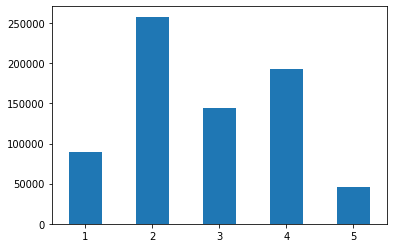

In [68]:
# Use pandas. plot to plot bar
# .sort_index make sure its not sorted according to the value

transactions['creditLimitCategory'].value_counts().sort_index(axis=0).plot(kind='bar', rot = 0, x = 'category')


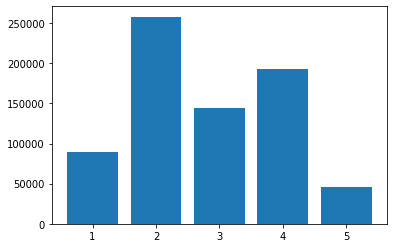

In [69]:
# alternative, use matplot lib plt.bar()
labels, counts = np.unique(transactions['creditLimitCategory'],return_counts = True)
plt.bar(labels, counts, align= 'center')
plt.gca().set_xticks(labels)
plt.show()

## 8 Save Data<a id='8._Save'></a>

In [70]:
transactions.dtypes

accountNumber                       object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
transactionType                     object
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
isFraud                               bool
CVVMatch                              bool
containsCom                           bool
lengthOfLast4Digits                  int64
creditLimitCategory                  int64
dtype: obje

In [71]:
datapath = '../CreditCardFraud/data'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory 'data' and resave the data files.

# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.

#if path doesnt exist
if not os.path.exists(datapath):
    #create data path
    os.mkdir(datapath)
    
    

In [72]:
datapath_transactiondata = os.path.join(datapath, 'transaction_data_cleaned.csv')

transactions.to_csv(datapath_transactiondata, index=False)
print(datapath_transactiondata)

../CreditCardFraud/data/transaction_data_cleaned.csv


In [73]:
df = pd.read_csv('data/transaction_data_cleaned.csv')


In [74]:
df

accountNumber  creditLimit  availableMoney  transactionDateTime  \
0           419104777      50000.0        50000.00  2016-01-01 00:01:02   
1           958438658      20000.0        20000.00  2016-01-01 00:01:47   
2           851126461      10000.0        10000.00  2016-01-01 00:02:04   
3           148963316       2500.0         2500.00  2016-01-01 00:02:19   
4           974901832        250.0          250.00  2016-01-01 00:03:47   
...               ...          ...             ...                  ...   
731555      690351684       7500.0         6007.68  2016-12-30 23:57:33   
731556      365766122       7500.0          970.87  2016-12-30 23:58:25   
731557      543902721       1000.0          767.70  2016-12-30 23:59:33   
731558      912493707       5000.0         4991.10  2016-12-30 23:59:35   
731559      152973583      15000.0         7195.76  2016-12-30 23:59:45   

        transactionAmount     merchantName acqCountry merchantCountryCode  \
0                   44.09  Washington Post         US                  US   
1                  164.57    cheapfast.com         US                  US   
2                  122.83     discount.com         US                  US   
3                    0.00      Fast Repair         US                  US   
4                   24.56      staples.com         US                  US   
...                   ...              ...        ...                 ...   
731555             128.84     EZ Putt Putt         US                  US   
731556              49.47      alibaba.com         US                  US   
731557              13.02          abc.com         US                  US   
731558               8.85       Play Store         US                  US   
731559             169.07      Burger King         US                  US   

        posEntryMode  posConditionCode  ... dateOfLastAddressChange  \
0                  9                 1  ...     2015-05-30 00:00:00   
1                  5                 1  ...     2013-07-20 00:00:00   
2                  2                 8  ...     2014-10-18 00:00:00   
3                  5                 1  ...     2013-12-12 00:00:00   
4                  5                 1  ...     2012-05-29 00:00:00   
...              ...               ...  ...                     ...   
731555             9                 1  ...     2015-02-26 00:00:00   
731556            90                 1  ...     2016-10-06 00:00:00   
731557             5                 8  ...     2012-02-11 00:00:00   
731558             9                 8  ...     2016-10-31 00:00:00   
731559             9                 1  ...     2016-08-19 00:00:00   

             transactionType currentBalance cardPresent  \
0                   PURCHASE           0.00       False   
1                   PURCHASE           0.00       False   
2                   PURCHASE           0.00       False   
3       ADDRESS_VERIFICATION           0.00       False   
4                   PURCHASE           0.00       False   
...                      ...            ...         ...   
731555              PURCHASE        1492.32        True   
731556              PURCHASE        6529.13       False   
731557              PURCHASE         232.30       False   
731558              PURCHASE           8.90       False   
731559              PURCHASE        7804.24        True   

       expirationDateKeyInMatch  isFraud  CVVMatch  containsCom  \
0                         False    False      True        False   
1                         False    False      True         True   
2                         False    False      True         True   
3                         False    False      True        False   
4                         False    False      True         True   
...                         ...      ...       ...          ...   
731555                    False    False      True        False   
731556                    False    False      True         True   
731557           

In [75]:
df.isnull().sum()

accountNumber               0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
CVVMatch                    0
containsCom                 0
lengthOfLast4Digits         0
creditLimitCategory         0
dtype: int64